In [1]:
import rasterio 
import rasterio.plot

from osgeo import gdal

import os

import glob
import re
vrt_options = gdal.BuildVRTOptions(resampleAlg=gdal.GRA_NearestNeighbour, addAlpha=True)

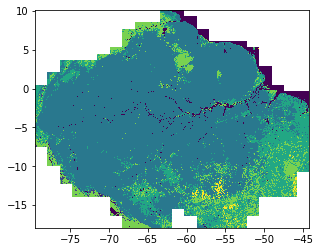

In [2]:
outdir = r'F:\acoca\research\gee\dataset\AMZ\eval\pred\4_local\ep30\convgru\convgru128_010203_adam_fold0_MCD12Q1v6stable01to15_LCProp2_major_169921\2001'

fileNames = glob.glob(os.path.join(outdir,'prediction','*.tif'))

#sort dataframe by numeric format
fileNames.sort(key=lambda f: int(re.sub('\D', '', f)))

if not os.path.isfile(os.path.join(os.path.dirname(outdir),'2001.vrt')):
    test_vrt = gdal.BuildVRT(os.path.join(os.path.dirname(outdir),'2001.vrt'), fileNames, options=vrt_options)

test_vrt = None

raster_vrt = rasterio.open(os.path.join(os.path.dirname(outdir),'2001.vrt'))

rasterio.plot.show(raster_vrt)

raster_vrt.close()